In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import warnings
warnings.filterwarnings("ignore")

In [24]:
df = pd.read_excel ('monthly export amount2.xlsx')
df

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,155
0,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,155
1,2007-01-01 00:00:00,2007-02-01 00:00:00,2007-03-01 00:00:00,2007-04-01 00:00:00,2007-05-01 00:00:00,2007-06-01 00:00:00,2007-07-01 00:00:00,2007-08-01 00:00:00,2007-09-01 00:00:00,2007-10-01 00:00:00,...,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00
2,38223018,35866026,41532719,39443013,39852981,39387232,35048576,37669038,35534156,37291389,...,51935479,49858132,55511984,51068508,48912380,49320631,49234963,50888374,47479186,49775699


Because the data frame had 3 rows and 156 columns, it should be transposed to 3 columns which one of them is date and the other amounts, also one column as an ID.

In [25]:
df =df.transpose()


In [26]:
df.columns = ['ID','Datetime','Total']

df

,ID,Datetime,Total
0,0,2007-01-01,38223018
1,1,2007-02-01,35866026
2,2,2007-03-01,41532719
3,3,2007-04-01,39443013
4,4,2007-05-01,39852981
...,...,...,...
151,151,2019-08-01,49320631
152,152,2019-09-01,49234963
153,153,2019-10-01,50888374
154,154,2019-11-01,47479186


In [27]:

df.dtypes

ID                  object
Datetime    datetime64[ns]
Total               object
dtype: object

In [28]:
df['ID'] = df['ID'].astype(np.float64)

df['Total'] = df['Total'].astype(np.float64)

Then split the test and train parts, which 2019 is the test and the previous 12 years are train.

In [30]:
train=df[0:144] 
test=df[144:]

In [31]:
#Aggregating the dataset at monthly level
df.Timestamp = pd.to_datetime(df.Datetime,format='%d-%m-%Y') 
df.index = df.Timestamp 
df = df.resample('M').mean()
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y') 
train.index = train.Timestamp 
train = train.resample('M').mean() 
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y') 
test.index = test.Timestamp 
test = test.resample('M').mean()

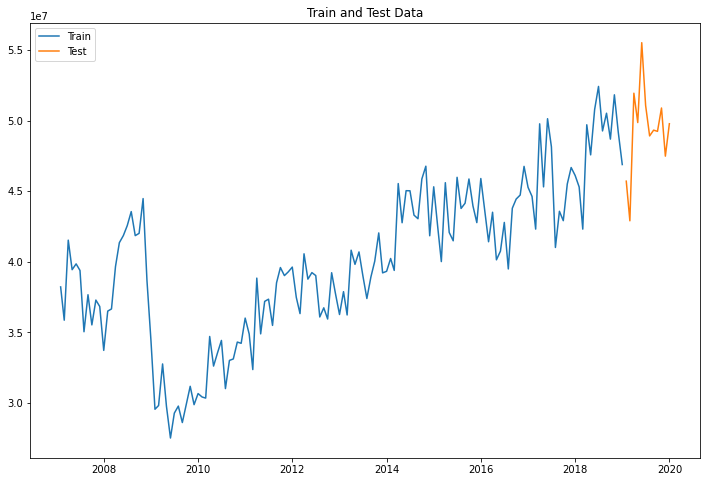

In [32]:
plt.figure(figsize=(12,8))
plt.title("Train and Test Data")
plt.plot(train.index, train['Total'], label='Train')
plt.plot(test.index,test['Total'], label='Test')
plt.legend(loc='best')
plt.show()

The naive forecast creates a baseline forecast that can allow a forecast value-add for more advanced methods.
Naive forecast is the starting point for statistical forecast improvement.
Naive forecasts can often beat demand planning models which are much more sophisticated and higher cost to implement
The idea behind the naive method for forecasting is to simply choose the data value from the previous period to estimate the next period.




 
The Naive forecasting method of forecasting is one the easiest of all methods. 

In [33]:

dd = np.asarray(train.Total)
lastvalue = dd[len(dd)-1]

In [34]:

y_hat = test.copy()
y_hat['naive'] = lastvalue
y_hat.describe()

,ID,Total,naive
count,12.000000,1.200000e+01,12.0
mean,149.500000,4.938307e+07,46885254.0
std,3.605551,3.146873e+06,0.0
min,144.000000,4.290298e+07,46885254.0
25%,146.750000,4.855408e+07,46885254.0
50%,149.500000,4.954816e+07,46885254.0
75%,152.250000,5.093341e+07,46885254.0
max,155.000000,5.551198e+07,46885254.0


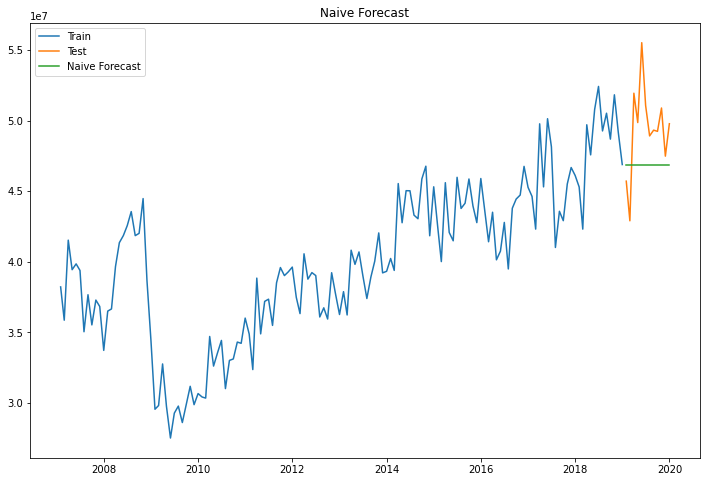

In [35]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Total'], label='Train')
plt.plot(test.index,test['Total'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [52]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(test.Total, y_hat.naive))/10000000
print('RMSE = '+str(rms))

RMSE = 0.39136500220191295


The same calculation to the import data.

In [39]:
df2 = pd.read_excel ('monthly import amount2.xlsx')

In [40]:
df2 =df2.transpose()
df2.columns = ['ID','Datetime','Total']

df2

,ID,Datetime,Total
0,0,2007-01-01,32224562
1,1,2007-02-01,32242267
2,2,2007-03-01,37580303
3,3,2007-04-01,34869515
4,4,2007-05-01,35548764
...,...,...,...
151,151,2019-08-01,51815887
152,152,2019-09-01,49366806
153,153,2019-10-01,51827652
154,154,2019-11-01,47939304


In [41]:
df2['ID'] = df2['ID'].astype(np.float64)

df2['Total'] = df2['Total'].astype(np.float64)

In [42]:
train2=df2[0:144] 
test2=df2[144:]

In [43]:
df2.Timestamp = pd.to_datetime(df2.Datetime,format='%d-%m-%Y') 
df2.index = df2.Timestamp 
df2 = df2.resample('M').mean()
train2.Timestamp = pd.to_datetime(train2.Datetime,format='%d-%m-%Y') 
train2.index = train2.Timestamp 
train2 = train2.resample('M').mean() 
test2.Timestamp = pd.to_datetime(test2.Datetime,format='%d-%m-%Y') 
test2.index = test2.Timestamp 
test2 = test2.resample('M').mean()

In [46]:
dd2 = np.asarray(train2.Total)
lastvalue2 = dd2[len(dd2)-1]

In [47]:
y_hat2 = test2.copy()
y_hat2['naive'] = lastvalue2
y_hat2.describe()

,ID,Total,naive
count,12.000000,1.200000e+01,12.0
mean,149.500000,5.011273e+07,46863194.0
std,3.605551,2.735949e+06,0.0
min,144.000000,4.567022e+07,46863194.0
25%,146.750000,4.799136e+07,46863194.0
50%,149.500000,5.028947e+07,46863194.0
75%,152.250000,5.188578e+07,46863194.0
max,155.000000,5.421021e+07,46863194.0


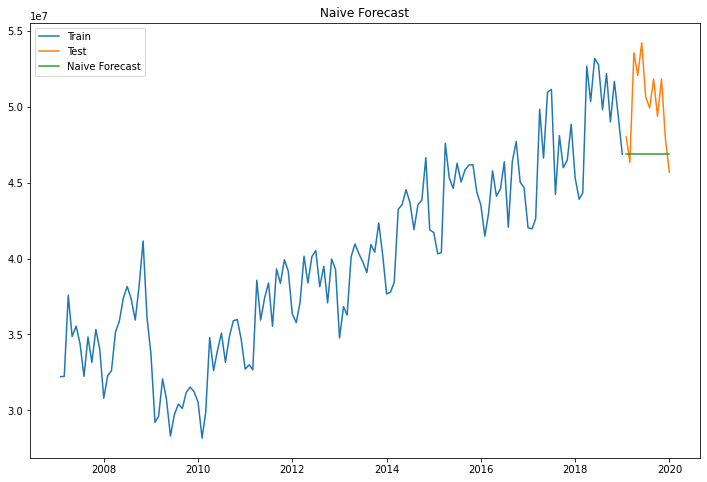

In [48]:
plt.figure(figsize=(12,8))
plt.plot(train2.index, train2['Total'], label='Train')
plt.plot(test2.index,test2['Total'], label='Test')
plt.plot(y_hat2.index,y_hat2['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [51]:
rms2 = sqrt(mean_squared_error(test2.Total, y_hat2.naive))/10000000
print('RMSE = '+str(rms2))

RMSE = 0.4173863838765886
